<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project by SAHAN</b></p>

<p style="background-color:orange;font-family:calibri;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>Multiple Linear Regression</b></p>

# Multiple Linear Regression and Regression Error Metrics¶

In [1]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.

# According to the underlying data set:   X1 : TV    X2: Radio    X3: newspaper

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
# Since we recognised the data in the previous Simple Linenar Regression, we do not go into detail here. Please go to my simple linear regression project for details.

## Data Preparation -  EDA

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
 # !pip install missingno  
# visualise the structure and distribution of missing data

In [10]:
import missingno as msno

<Axes: >

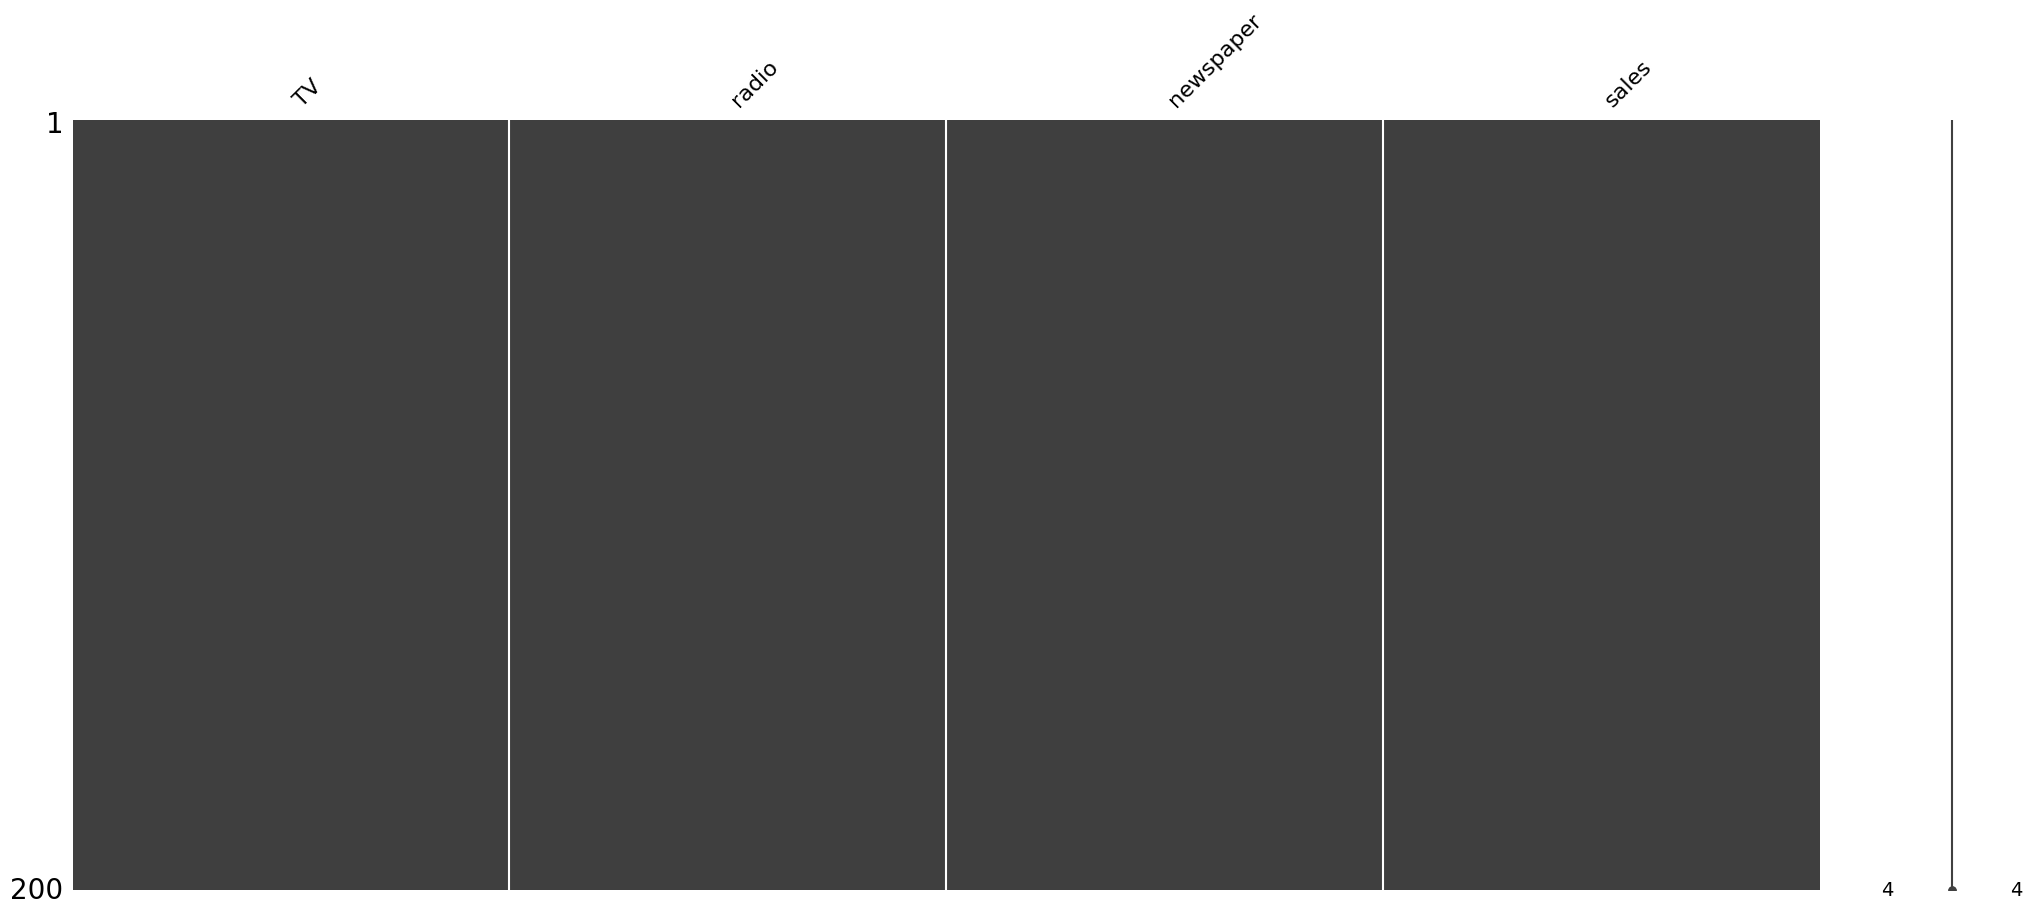

In [11]:
msno.matrix(df)

In [12]:
# sample image with null cells (taken from a different data set)

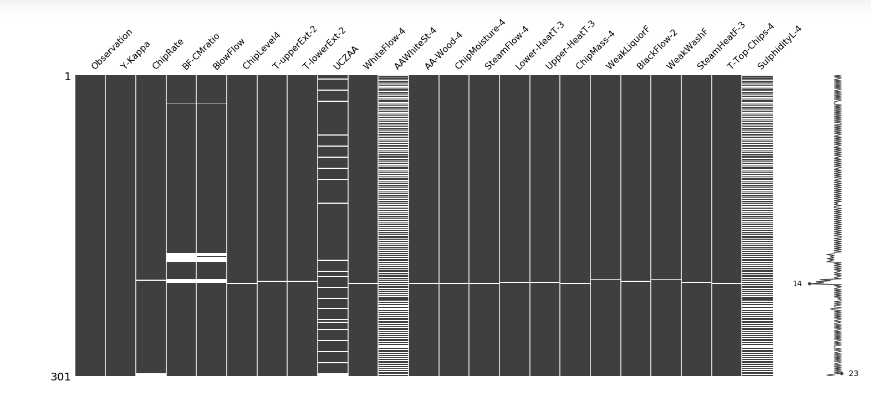

In [13]:
df.sort_values(by="sales", ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [14]:
df.describe().T   # the interpretation of this table was done in simple linear

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [15]:
# !pip install summarytools

In [16]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAAB

In [17]:
# The importance of the closeness of mean and std values in outlier detection //
# // Let's evaluate with an example (parenthesis to the NB stream)

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [18]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [19]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


In [20]:
# We resume the NB flow again

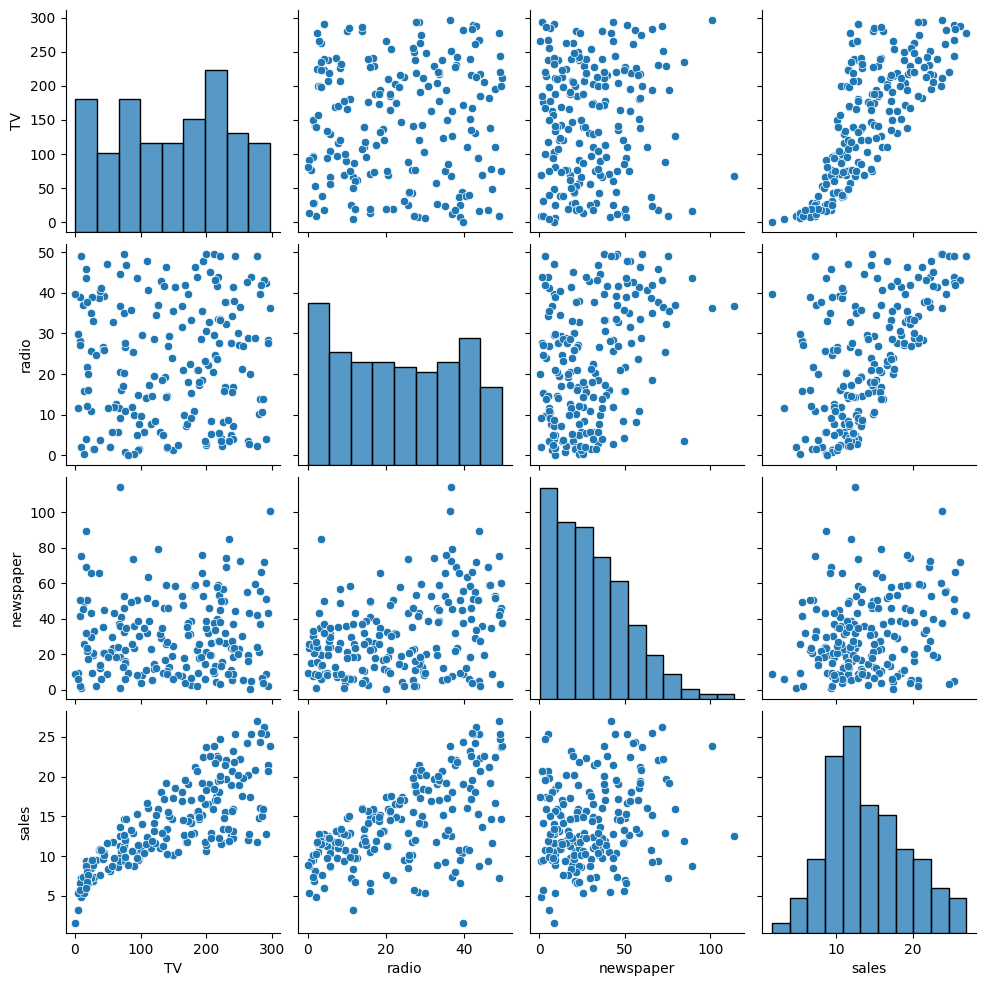

In [21]:
sns.pairplot(df);

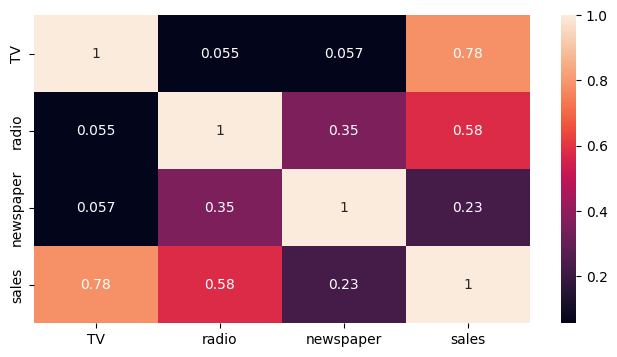

In [22]:
sns.heatmap(df.corr(), annot= True);

In [23]:
from scipy.stats import skew

In [24]:
# a loop for skewness detection
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# calculates the skewness value of all features except the sales column

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


For skewness values between -0.5 and + 0.5, the distribution can be considered to be roughly symmetrical

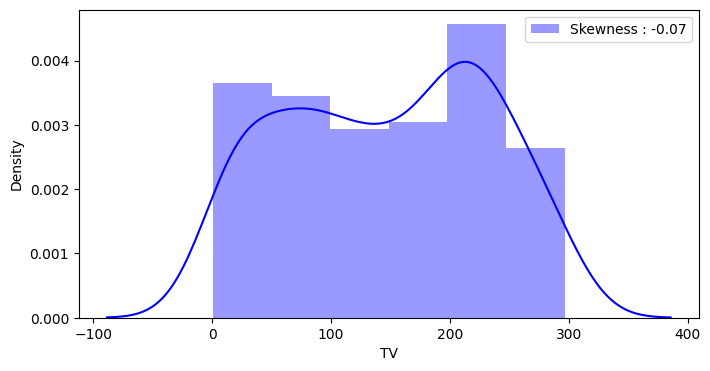

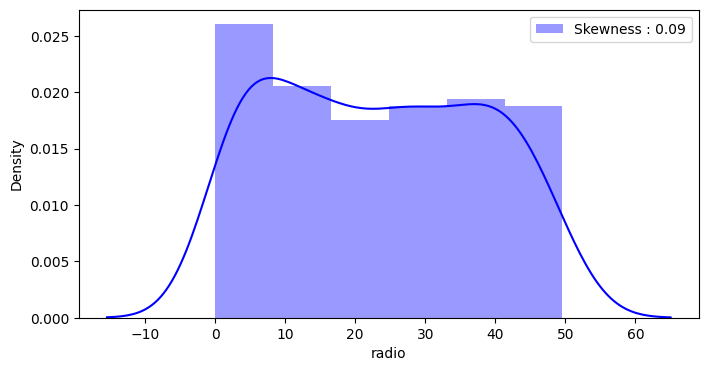

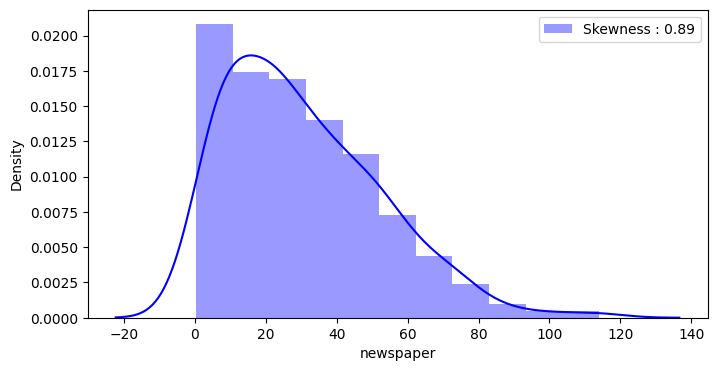

In [25]:
for j in df.drop(columns = "sales").columns:     #"removing sales" column from dataframe
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  Plotting a scatter plot of the data for column j. Creates the label shown above the plot. The label contains the skewness value (skewness) of that column
    g = g.legend(loc= "best")   #  optimise the position of the label on the graphic
    plt.show()

In [26]:
df.corr()   

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [27]:
#!pip install ydata-profiling

In [28]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

In [29]:
# use ProfileReport
pr_df = ProfileReport(df)

In [30]:
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [31]:
# The library used for ML is the Scikit-Learn library

# !pip install scikit-learn 
# !pip install sklearn

In [32]:
X = df.drop(columns="sales")   # df[["TV", "radio", "newspaper"]] , Indep.variables assigned to X
y = df["sales"]                # I assigned my target variable as a target in front of my model.

print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [33]:
#It is used to randomly divide your data set into training and testing subsets.

from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

X_train: Contains the features of the training dataset.

X_test: Contains the features of the test data set.

y_train: Contains the labels (labels/targets) of the training dataset.

y_test: Contains the labels (labels/targets) of the test data set.

train_test_split(X, y, test_size=0.3, random_state=42): This function call randomly splits the datasets X (features) and y (labels) into training and test subsets.

In [35]:
df.sample(15)

,TV,radio,newspaper,sales
152,197.6,23.3,14.2,16.6
80,76.4,26.7,22.3,11.8
110,225.8,8.2,56.5,13.4
46,89.7,9.9,35.7,10.6
82,75.3,20.3,32.5,11.3
79,116.0,7.7,23.1,11.0
3,151.5,41.3,58.5,18.5
142,220.5,33.2,37.9,20.1
78,5.4,29.9,9.4,5.3
94,107.4,14.0,10.9,11.5


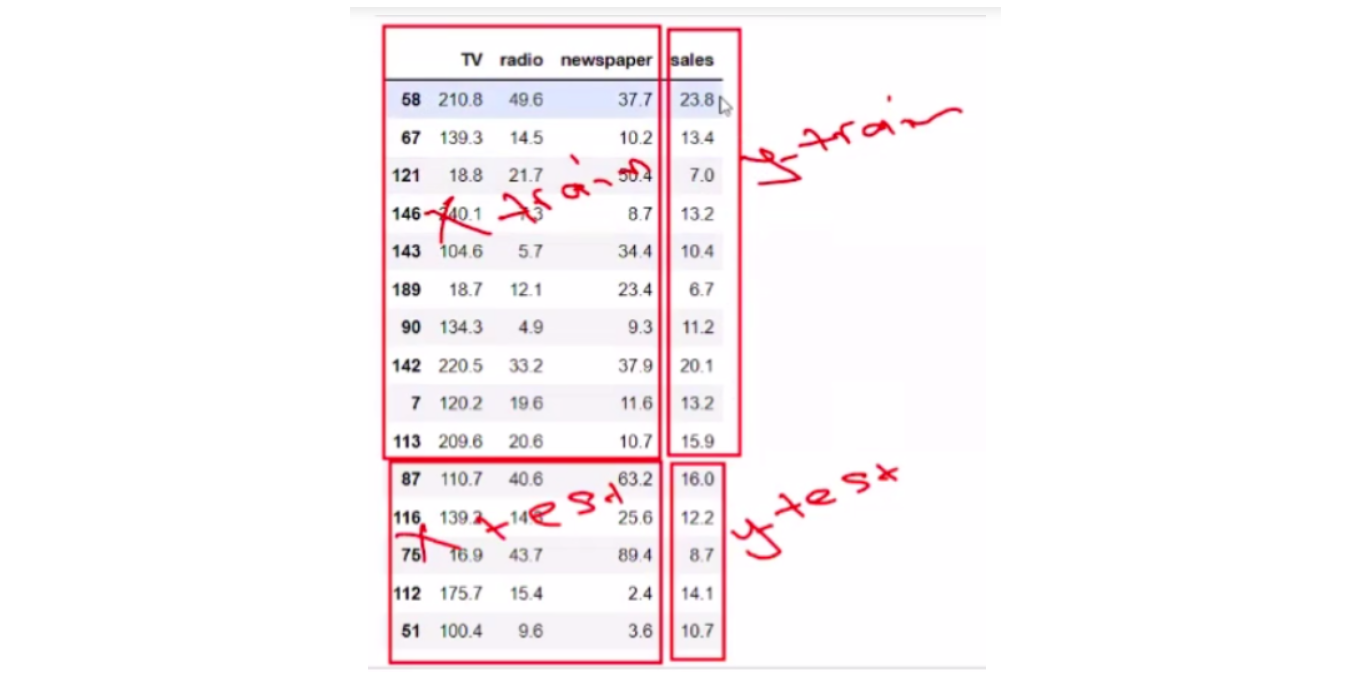

In [36]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# Let's look at the shapes of train and test sets

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [37]:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [38]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [39]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [40]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [41]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

# Model Fitting and Compare Actual and Predicted Labels

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

# We will always assign the algorithm to a variable. Because otherwise you can get an error while in the prediction section

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [46]:
model.coef_     # gives the coefficients of the model  (TV:0.04, radio:0.199, newsp:0.006)

array([0.04405928, 0.1992875 , 0.00688245])

In [47]:
model.feature_names_in_      # yukardaki katsayıların sıryla hangi featurer'lara ait olduğunu bildirir

array(['TV', 'radio', 'newspaper'], dtype=object)

In [48]:
model.intercept_     # gives the constant number in the model

2.7089490925159065

y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0

(b1:0.04, b2:0.199, b3:0.006)   
b0: 2.71

In [49]:
# let's make a prediction for values in any row...let's calculate y_pred manually
# this value is a manual prediction of the actual value 16.9, which is the line 95 value in y_test

sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [50]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

# actual: actual value, pred: predicted value, residual: actual value - predicted value


In [51]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [52]:
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


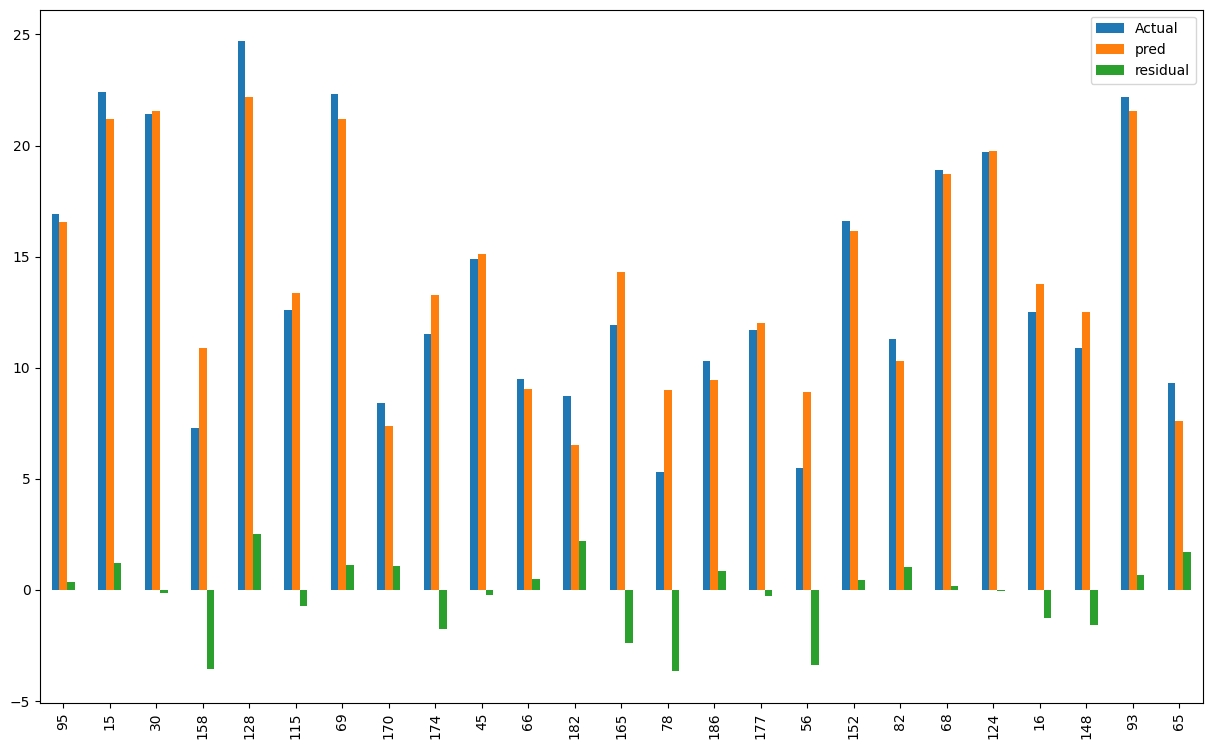

In [53]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

# Error Metrics

In [54]:
# measure the success of the model

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# error metrics we will use for performance evaluation
# We will calculate the RMSE metric manually (as the square root of MSE)


In [56]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8609466508230368

In [57]:
# MAE calculation (Desired to be close to zero)
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549086

In [58]:
# Mean squared error hesabı
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [59]:
# Root Mean Squared Error - RMSE  calculation (Desired to be close to zero)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446387

In [60]:
# Average Error Rate 

# is the normalised version of errors such as RMSE. This makes it possible to compare different models with each other


In [61]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [62]:
# MAE Hata Oranı - "Being close to 0 indicates that it is a good prediction model"
mae / sales_mean

0.10780311802138767

In [63]:
# RMSE Error Rate   (Normalized RMSE)
rmse / sales_mean

0.138957903679418

# Adjusted R2 Score (düzeltilmiş R2 degeri)


n = observation count (number of data points)
p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

In [64]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred) # calculates the R2 score between actual values (y_test) and predicted values (y_pred).
    n = df.shape[0]   # number of observations observation - assigns the number of observations (rows) in the data frame to variable n.

    p = df.shape[1]-1 # number of independent variables feature - assigns the number of independent variables (features) in the data frame to variable p. 
                      # The reason for doing -1 is usually the assumption that the target variable may also be in this data frame.

    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  # This line calculates adj_r2 using the adjusted R2 formula.
    return adj_r2

In [65]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [66]:
# it came out close to the previous r2 value. because there were already 3 features. let's see the adjusted effect by exaggerating the number of features in the lower example


In [67]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables .. We've got 100 features.
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [68]:
adj_r2(y_test, y_pred, df)

0.7204887223614578

In [69]:
# According to one view, for each added feature, 10-15 more observation lines should be added

# Evaluation Model

In [70]:
# We will make a general evaluation of the model at this stage


In [71]:
# Code blog that calculates and writes error metrics

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [72]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549086
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


In [73]:
# To check for overfitting, let's find the R2 in the train data and compare it with the test R2 (0.86) above


In [74]:
# We'll predict the X_train values
y_train_pred = model.predict(X_train)

In [75]:
eval_metric(y_train,y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072526
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [76]:
# Train R2 and Test R2 are quite close to each other. As a first impression, it can be said that there is no overfitting 
# but the final decision is also made by looking at the following processes


### Residuals Plotting

In [77]:
# One of the steps to look at is how the Residuals are distributed 

In [78]:
residuals = y_test - y_pred

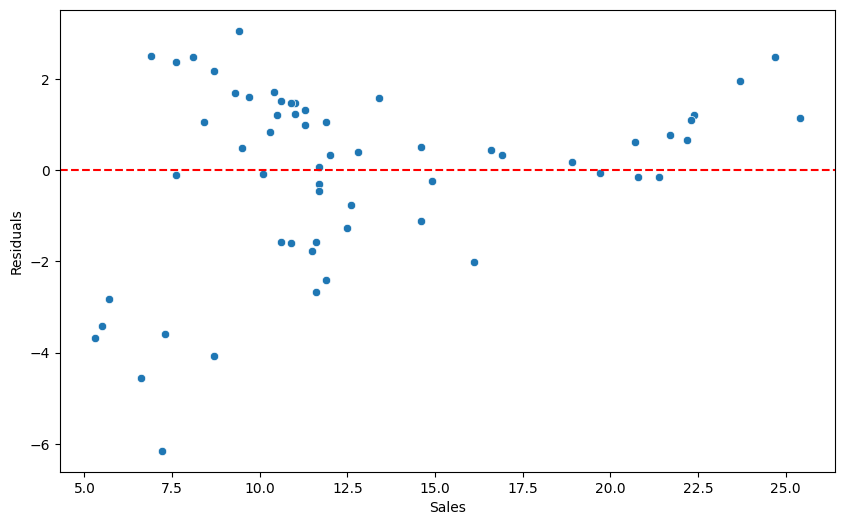

In [79]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

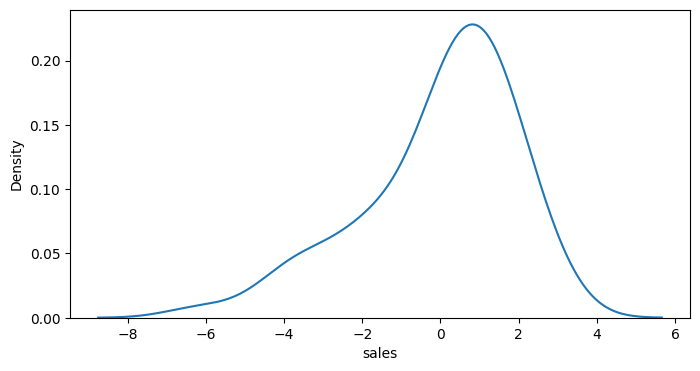

In [80]:
sns.kdeplot(residuals);

Let's also take a further look at the Q-Q plot: (used to check the correspondence between residuals


((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-6.15360735, -4.5531472 , -4.07770578, -3.67026042, -3.58923816,
         -3.41549403, -2.81412012, -

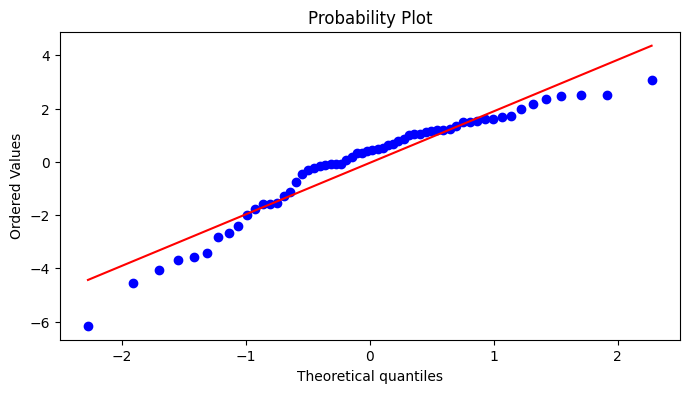

In [81]:
stats.probplot(residuals, dist = "norm", plot = plt)

Interpretation of the graph: If the points are regularly arranged on the line, this data set can be said to be normally distributed.


In [82]:
skew(residuals)

-0.9865673346742722

Tabachnik and Fidel say that the range of -+ 1.5 for Skewnnes can be accepted as a normal distribution. Here, the skewness for Resiadıals was 0.98. 


In [83]:
# pip install yellowbrick 

In [84]:
from yellowbrick.regressor import ResidualsPlot

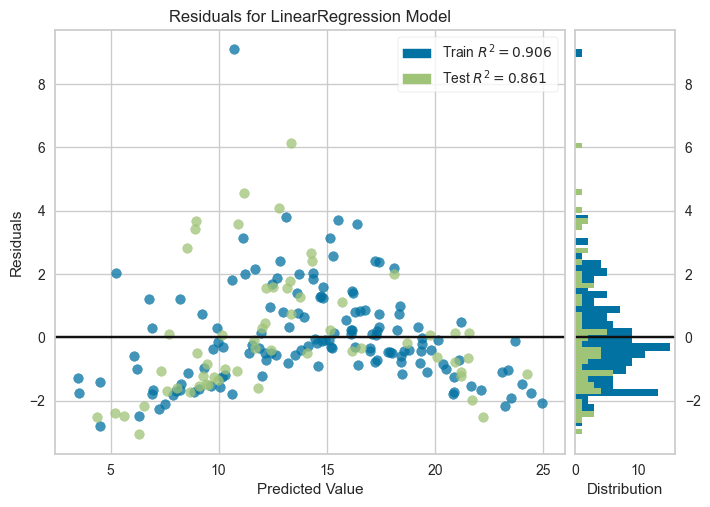

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [85]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Overfitting kontrolü için 2. önemli adım: Prediction Error

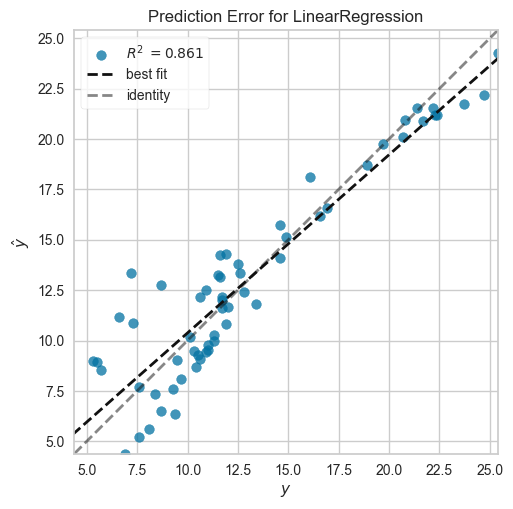

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [86]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Final Model

In [87]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [88]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [89]:
final_model.intercept_

2.938889369459412

In [90]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

# Let's see the coefficients in a data frame

In [91]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [92]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [93]:
#Model testing with an example data entry
adv = [[150,20,15]]

In [94]:
final_model.predict(adv)

array([13.55862413])

In [95]:
# manual check of the prediction result on the top
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # yeni datanın değerini manuel olarak sağlamasını yaptık.

13.558624130495996